In [3]:
# Similar to the other notebook but the data is sourced directly from the ExpDev API.  See ../expdev07/README.md
import os
import pandas as pd
import json

In [32]:
# Load Data
datapath = '../expdev07/all.json'

df = []
with open(datapath, 'r', encoding='utf-8') as inFh:
    data = json.load(inFh)
    for row in data['confirmed']['locations']:
        country = row['country']
        province = row['province']
        for h in row['history']:
            df.append({'country':country, 'province': province, 'date': h, 'value':row['history'][h]})
    df=pd.DataFrame(df)

df = df[df['country']=='US']
df.index = pd.to_datetime(df['date'])
del df['date']
del df['country']
df.sum()
#df=df.pivot(columns='province')

if False:
    #last_date = list(df.columns)[-1]
    print(df['Canada'].iloc[-1])
    print(df.columns)
    df.index=df['date']
    del df['Worldwide']
    del df['International']

    selected = [c for c in df.columns if c!='date' and df[c].iloc[-1]>200]

    print(selected)
    filtered = df[selected]

    df=filtered
df

,province,value
date,,
2020-01-22,Washington,0
2020-01-23,Washington,0
2020-01-24,Washington,0
2020-01-25,Washington,0
2020-01-26,Washington,0
2020-01-27,Washington,0
2020-01-28,Washington,0
2020-01-29,Washington,0
2020-01-30,Washington,0


In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 10]

In [48]:

for c in df.columns:    
    for i,a in enumerate(df[c]):        
        #if i==0 and a>100:
        #    df[c]=df[c].shift(4) # hack to push out china
        #    break
        if a>=100:
            df[c]=df[c].shift(-i)            
            break
df=df.reset_index(drop=True)
df

,Austria,Belgium,China,Denmark,France,Germany,Iran,Italy,Japan,Netherlands,Norway,Qatar,South Korea,Spain,Sweden,Switzerland,United Kingdom,United States
0,104.0,109.0,278,262.0,100.0,129.0,141.0,124.0,105.0,128.0,113.0,262.0,104.0,114.0,137.0,209.0,118.0,108.0
1,112.0,169.0,310,615.0,100.0,157.0,245.0,229.0,132.0,188.0,147.0,262.0,204.0,151.0,161.0,264.0,167.0,129.0
2,131.0,200.0,574,674.0,191.0,196.0,388.0,322.0,144.0,265.0,169.0,NaN,346.0,198.0,203.0,332.0,210.0,148.0
3,182.0,239.0,835,NaN,212.0,262.0,593.0,400.0,157.0,321.0,192.0,NaN,602.0,257.0,248.0,332.0,277.0,213.0
4,302.0,267.0,1297,NaN,282.0,534.0,978.0,650.0,164.0,382.0,277.0,NaN,763.0,374.0,326.0,491.0,323.0,213.0
5,361.0,314.0,1985,NaN,420.0,639.0,1501.0,888.0,186.0,503.0,489.0,NaN,977.0,430.0,461.0,645.0,373.0,213.0
6,NaN,314.0,2761,NaN,613.0,795.0,2336.0,1128.0,210.0,614.0,489.0,NaN,1261.0,589.0,620.0,858.0,460.0,472.0
7,NaN,NaN,4537,NaN,706.0,1112.0,2922.0,1689.0,230.0,NaN,NaN,NaN,1766.0,1024.0,NaN,NaN,594.0,696.0
8,NaN,NaN,5997,NaN,1116.0,1139.0,3513.0,2036.0,239.0,NaN,NaN,NaN,2337.0,1639.0,NaN,NaN,NaN,987.0
9,NaN,NaN,7736,NaN,1402.0,1296.0,4747.0,2502.0,254.0,NaN,NaN,NaN,3150.0,2140.0,NaN,NaN,NaN,1264.0


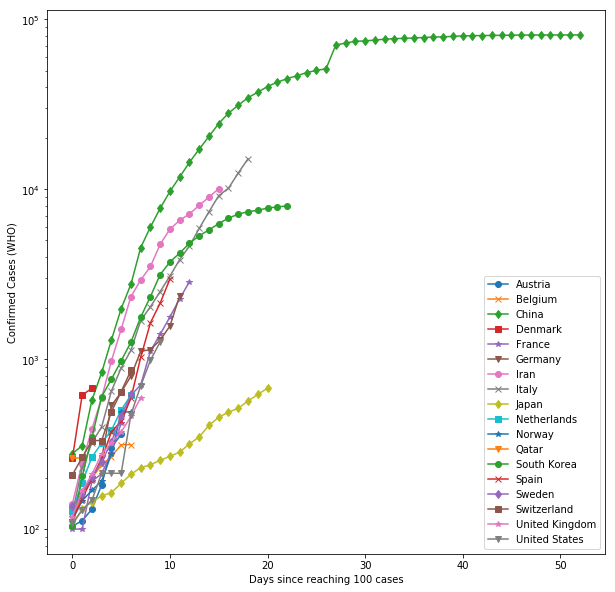

In [49]:
from math import ceil
fig, ax = plt.subplots()
markers = [item for sublist in ['oxds*v']*ceil(len(df.columns)/5) for item in sublist]
#df.plot(logy=True, ax=ax) #, ax=ax)
for c,m in zip(df,markers):
    df[c].plot(logy=True, marker=m,  ax=ax)

ax.set_ylabel('Confirmed Cases (WHO)')
ax.set_xlabel('Days since reaching 100 cases')
ax.legend()
